In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scanpy as sc
from matplotlib import rc_context

/home/wu/mambaforge/envs/AutoExtract/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/wu/mambaforge/envs/AutoExtract/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/wu/mambaforge/envs/AutoExtract/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/wu/mambaforge/envs/AutoExtract/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/wu/mambaforge/envs/AutoExtract/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarn

In [3]:
# from statannotations.Annotator import Annotator
sc.set_figure_params(vector_friendly=True, dpi_save=600) 

In [4]:
os.chdir('/home/wu/datb1/AutoExtractSingleCell/AutoExtract_article_new')
sns.set_theme(style="white")

In [5]:
adata_scanorama_raw = sc.read('/home/wu/datb1/AutoExtractSingleCell/scanorama_prior/data/output_raw_scanorama.h5ad')

In [12]:
sc.pp.scale(adata_scanorama_raw)
sc.pp.pca(adata_scanorama_raw)

In [17]:
sc.pp.neighbors(adata_scanorama_raw)
sc.tl.umap(adata_scanorama_raw)

/home/wu/mambaforge/envs/AutoExtract/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


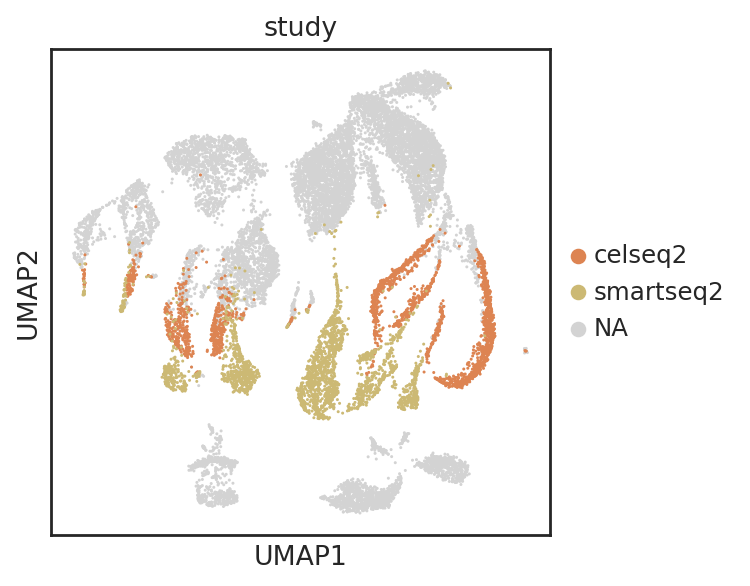

In [22]:
sc.pl.umap(adata_scanorama_raw, color='study', groups=['celseq2', 'smartseq2'])

In [39]:
adata_scanorama_raw_study_colors = {x: y for x, y in zip(adata_scanorama_raw.obs['study'].cat.categories, adata_scanorama_raw.uns['study_colors'])}
subtset_colors = [adata_scanorama_raw_study_colors[x] for x in ['celseq2', 'smartseq2']]

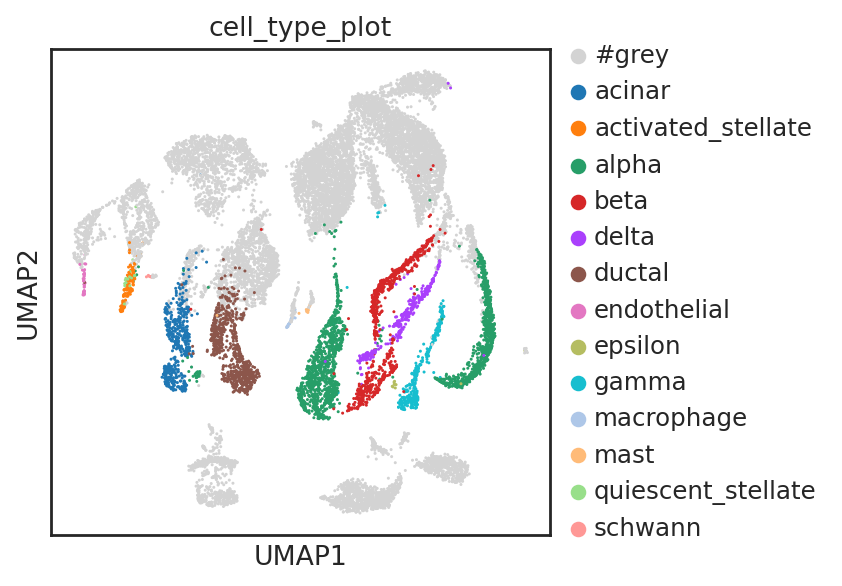

In [32]:
adata_scanorama_raw.obs['cell_type_plot'] = adata_scanorama_raw.obs['cell_type'].astype(str)
adata_scanorama_raw.obs.loc[~adata_scanorama_raw.obs['study'].isin(['celseq2', 'smartseq2']), 'cell_type_plot'] = '#grey'
adata_scanorama_raw.uns['cell_type_plot_colors'] = ['#D3D3D3'] + adata_scanorama_raw.uns['cell_type_colors'] 
sc.pl.umap(adata_scanorama_raw, color='cell_type_plot', palette=adata_scanorama_raw.uns['cell_type_plot_colors'])

/home/wu/mambaforge/envs/AutoExtract/lib/python3.12/site-packages/scanpy/plotting/_utils.py:487: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


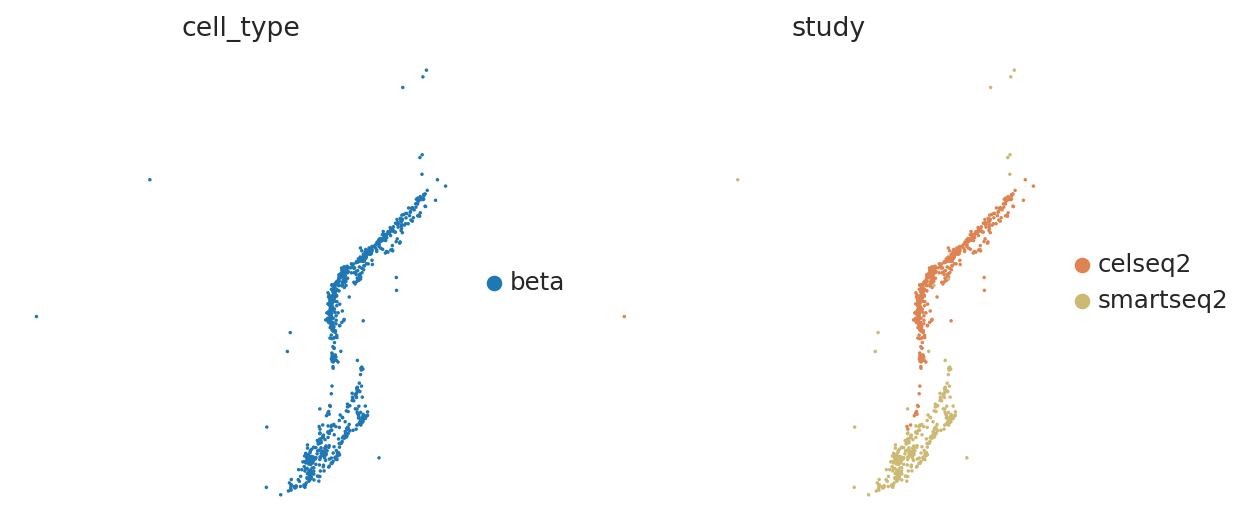

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3.5))
adata_scanorama_raw_plot = adata_scanorama_raw[(adata_scanorama_raw.obs['study'].isin(['celseq2', 'smartseq2'])) & (adata_scanorama_raw.obs['cell_type'].isin(['beta']))]
sc.pl.umap(adata_scanorama_raw_plot, color='study', size=10, palette=subtset_colors, ax=ax[1], show=False, frameon=False)
sc.pl.umap(adata_scanorama_raw_plot, color='cell_type', palette=adata_scanorama_raw.uns['cell_type_colors'], size=10, ax=ax[0], show=False, frameon=False)
fig.tight_layout()

In [121]:
subtset_colors

['#dd8452', '#ccb974']

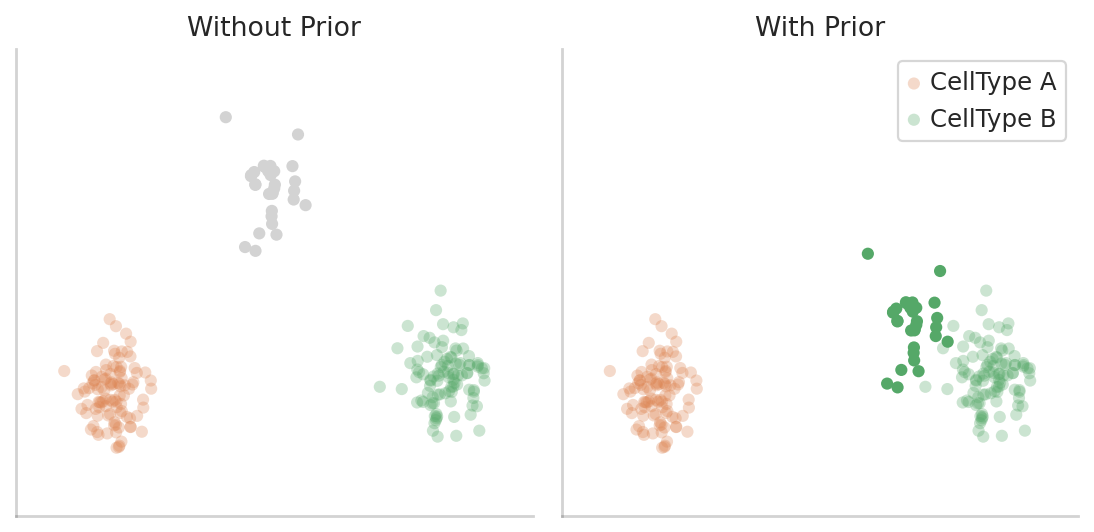

In [134]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.patches as patches

# Set style
# plt.style.use('seaborn-white')
# plt.rcParams['font.family'] = 'Arial'

# Set random seed for reproducibility
np.random.seed(42)

# Generate data for two batches
n_samples_per_batch = 100

# Batch 1 - compact distribution
X1, _ = make_blobs(n_samples=n_samples_per_batch, centers=1, 
                   cluster_std=0.2, center_box=(1, 1))

# Batch 2 - compact distribution
X2, _ = make_blobs(n_samples=n_samples_per_batch, centers=1, 
                   cluster_std=0.2, center_box=(6, 1))

# Generate ambiguous cells 
n_ambiguous = 30
ambiguous_cells = np.random.normal(loc=2.5, scale=0.2, size=(n_ambiguous, 2))

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3.5))
fig.subplots_adjust(wspace=0.3)

# Define colors with better visibility
colors = {
    'batch1': '#dd8452',
    'batch2': '#55a868',
    'ambiguous': 'lightgrey'
}

# Plot 1: Traditional Method
ax1.scatter(X1[:, 0], X1[:, 1], c=colors['batch1'], alpha=0.3, s=30, 
           label='Batch 1', edgecolors='none')
ax1.scatter(X2[:, 0], X2[:, 1], c=colors['batch2'], alpha=0.3, s=30, 
           label='Batch 2', edgecolors='none')
ax1.scatter(ambiguous_cells[:, 0], ambiguous_cells[:, 1], 
           c=colors['ambiguous'], alpha=1, s=30, 
           label='Ambiguous', edgecolors='none')

# Set the same axis limits for both plots
xlim = (min(X1[:, 0].min(), X2[:, 0].min(), ambiguous_cells[:, 0].min()) - 0.5,
        max(X1[:, 0].max(), X2[:, 0].max(), ambiguous_cells[:, 0].max()) + 0.5)
ylim = (min(X1[:, 1].min(), X2[:, 1].min(), ambiguous_cells[:, 1].min()) - 0.5,
        max(X1[:, 1].max(), X2[:, 1].max(), ambiguous_cells[:, 1].max()) + 0.5)

# Move ambiguous cells for the second plot
ambiguous_cells[:, 1] -= np.random.normal(loc=1, scale=0, size=n_ambiguous)
ambiguous_cells[:, 0] += np.random.normal(loc=1, scale=0, size=n_ambiguous)

# Plot 2: Improved Method
ax2.scatter(X1[:, 0], X1[:, 1], c=colors['batch1'], alpha=0.3, s=30, 
           label='CellType A', edgecolors='none')
ax2.scatter(X2[:, 0], X2[:, 1], c=colors['batch2'], alpha=0.3, s=30, 
           label='CellType B', edgecolors='none')
ax2.scatter(ambiguous_cells[:, 0], ambiguous_cells[:, 1], 
           c=colors['batch2'], alpha=1, s=30, edgecolors='none')

for ax in [ax1, ax2]:
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xticks([])
    ax.set_yticks([])

ax1.set_title('Without Prior')
ax2.set_title('With Prior')
ax2.legend(loc='upper right')
sns.despine(left=False, bottom=False)
# set axis alpha to 0.5
for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_alpha(0.2)
plt.tight_layout()

# Optionally save the figure
plt.savefig('/home/wu/datb1/AutoExtractSingleCell/AutoExtract_article_new/figures/fig6/scanorama_prior_show.pdf', dpi=300, bbox_inches='tight')
plt.show()
